In [1]:
import pandas as pd
from datetime import datetime as dt
import numpy as np
import re
#
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.cm as cm
#
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, classification_report
#
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.dummy import DummyClassifier

In [2]:
# Load data and rename the columns
df = pd.read_csv("C:/Users/storm/Desktop/METIS/Project/project 3/Forestfires_cleaned.csv")


In [3]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,fire_breakout
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
# create X matrix and y vector from columns 

X = df.drop(columns='fire_breakout')
y = df['fire_breakout']
print(X.shape , y.shape)

(517, 12) (517,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#set-up for cross validation

kf = KFold(n_splits=5, shuffle=True, random_state = 42)

In [14]:
# 5-fold cross-validation score with Naive Bayes

nb = BernoulliNB()
print(cross_val_score(nb, X, y, cv=kf, scoring='accuracy').mean())

0.5300224047796863


In [15]:
# 5-fold cross-validation score with Naive Bayes

nb = GaussianNB()
print(cross_val_score(nb, X, y, cv=kf, scoring='accuracy').mean())

0.5087565347274084


In [9]:
nb = BernoulliNB()
nb.fit(X_train,y_train)
nb.score(X_test,y_test)

0.5096153846153846

In [10]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_test, y_test)

0.5192307692307693

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


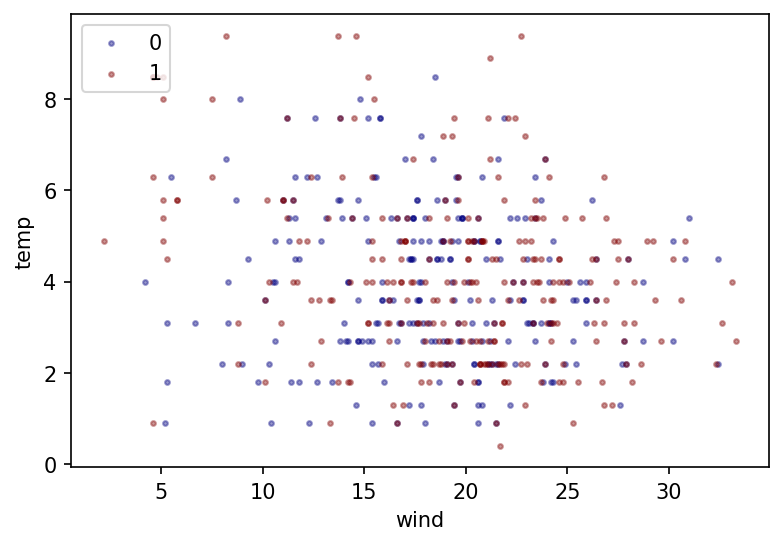

In [11]:
def scatter_plot_data(df):
    plt.figure(dpi=150)
    for ix, label in enumerate(['0','1']):
        new_data = df[df['fire_breakout']==ix]
        plt.scatter(new_data['temp'], new_data['wind'],c=plt.cm.jet(ix/0.5), alpha=0.4, label=label, s=5)
    plt.ylabel("temp")
    plt.xlabel("wind")
    plt.legend(loc="upper left");

scatter_plot_data(df)


In [12]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 3, x.max() + 3
    y_min, y_max = y.min() - 10, y.max() + 10
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, X, y, **params):
    """
    Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contours(xx, yy, Z, **params)
    return out

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


AttributeError: 'DataFrame' object has no attribute 'as_matrix'

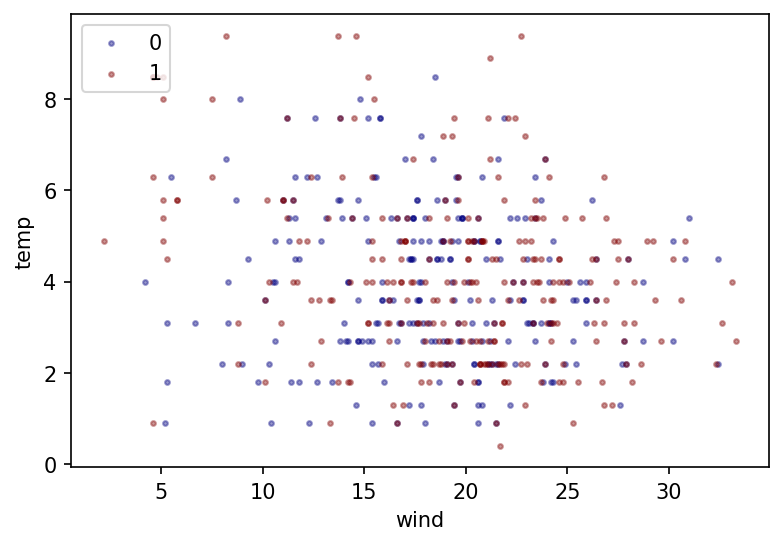

In [13]:
scatter_plot_data(df)
ax = plt.gca()
plot_contours(ax, nb, X.as_matrix(), y.as_matrix(), cmap=plt.cm.jet, alpha=0.3);

In [ ]:
#f1 score

f1_score(nb.predict(X_test), y_test)

In [ ]:
#f1 score

y_pred = nb.predict(X_test)

print(classification_report(y_test,y_pred))

In [ ]:
nb.theta_ # mean of each feature by class

In [ ]:
np.sqrt(nb.sigma_) # variance of each feature by class

In [ ]:
#choose either gaussian or bernouli for confusion matrix

nb = GaussianNB()
nb.fit(X_train, y_train)

In [ ]:
# Print confusion matrix for NB
from sklearn.metrics import confusion_matrix

nb_confusion = confusion_matrix(y_test, nb.predict(X_test))
plt.figure(dpi=80)
sns.heatmap(nb_confusion, annot = True, cmap=plt.cm.Blues)

plt.xlabel('Predicted fire outbreak')
plt.ylabel('Actual fire outbreak')
plt.title('NB confusion matrix');

#plt.savefig("confusion_matrix_knn_Forestfire")